In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
def plot_boxplot(x, ftr):
    print(ftr)
    x.boxplot(column=[ftr])
    plt.grid(False)
    plt.show()

temp


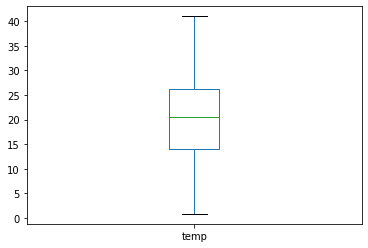

atemp


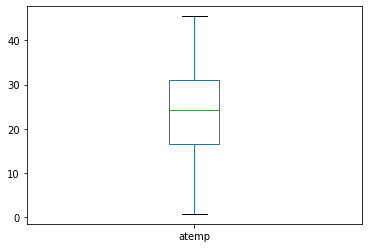

humidity


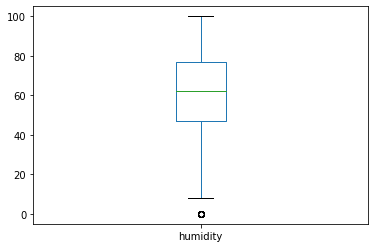

windspeed


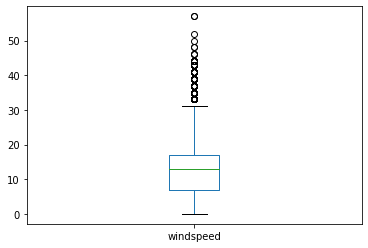

casual


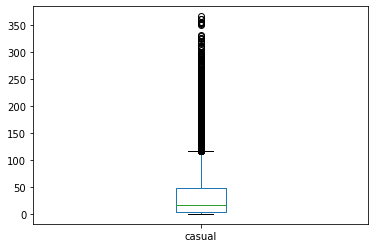

registered


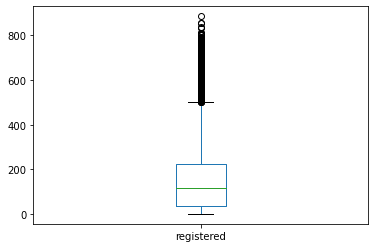

count


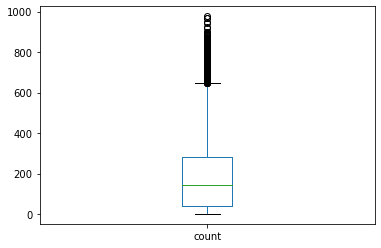

In [8]:
plot_boxplot(train, 'temp')
plot_boxplot(train, 'atemp')
plot_boxplot(train, 'humidity')
plot_boxplot(train, 'windspeed')
plot_boxplot(train, 'casual')
plot_boxplot(train, 'registered')
plot_boxplot(train, 'count')

In [29]:
numeric_cols = ['temp', 'atemp','humidity', 'windspeed']
category_cols = ['season', 'holiday', 'weather']
target = 'count'

In [10]:
def parse_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['time'] = df.datetime.dt.strftime('%H:%M:%S')
    df['week'] = df['datetime'].dt.isocalendar().week
    df['weekday'] = df['datetime'].dt.dayofweek
parse_datetime(train)
parse_datetime(test)
train.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
test.drop(['datetime'], axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,time,week,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,00:00:00,52,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,01:00:00,52,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,02:00:00,52,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,03:00:00,52,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,04:00:00,52,5


In [12]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,time,week,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,00:00:00,52,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,01:00:00,52,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,02:00:00,52,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,03:00:00,52,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,04:00:00,52,5


In [13]:
for feature in train[category_cols]:
        print(f'{feature}: {train[feature].unique()}')

season: [1 2 3 4]
holiday: [0 1]
weather: [1 2 3 4]


In [14]:
for col in numeric_cols:
    train[col].fillna(train[col].mean(), inplace=True)
    test[col].fillna(test[col].mean(), inplace=True)

In [15]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,time,week,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,00:00:00,52,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,01:00:00,52,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,02:00:00,52,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,03:00:00,52,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,04:00:00,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,19:00:00,51,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,20:00:00,51,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,21:00:00,51,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,22:00:00,51,2


In [16]:
test = test.reindex(columns=train.columns, fill_value=0)

In [17]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,time,week,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,1,20,0,00:00:00,3,3
1,1,0,1,1,10.66,13.635,56,0.0000,0,2011,1,20,1,01:00:00,3,3
2,1,0,1,1,10.66,13.635,56,0.0000,0,2011,1,20,2,02:00:00,3,3
3,1,0,1,1,10.66,12.880,56,11.0014,0,2011,1,20,3,03:00:00,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,0,2011,1,20,4,04:00:00,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,0,2012,12,31,19,19:00:00,1,0
6489,1,0,1,2,10.66,12.880,60,11.0014,0,2012,12,31,20,20:00:00,1,0
6490,1,0,1,1,10.66,12.880,60,11.0014,0,2012,12,31,21,21:00:00,1,0
6491,1,0,1,1,10.66,13.635,56,8.9981,0,2012,12,31,22,22:00:00,1,0


In [18]:
train, test, train, test = train_test_split(train, train, test_size=0.2, random_state=42)

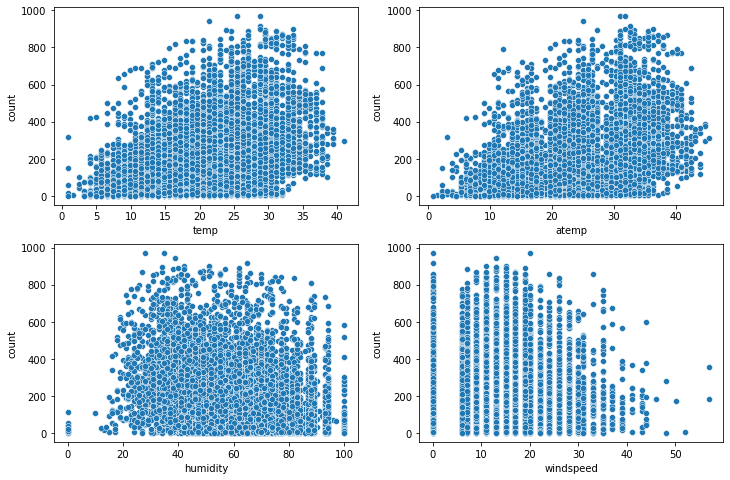

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(x='temp', y='count', data=train)
plt.subplot(2,2,2)
sns.scatterplot(x='atemp', y='count', data=train)
plt.subplot(2,2,3)
sns.scatterplot(x='humidity', y='count', data=train)
plt.subplot(2,2,4)
sns.scatterplot(x='windspeed', y='count', data=train)
plt.show()

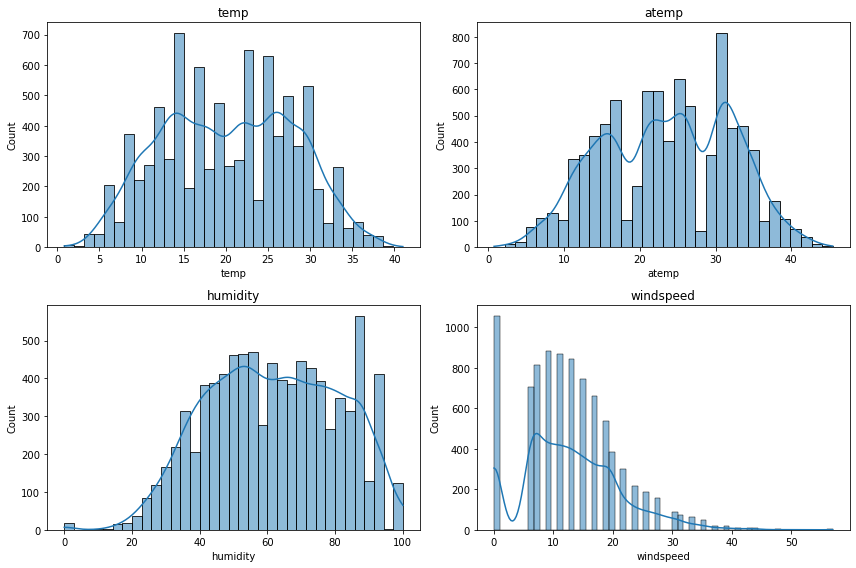

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(x=train[col], ax=axs[i], kde=True)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

/tmp/ipykernel_589/79496866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


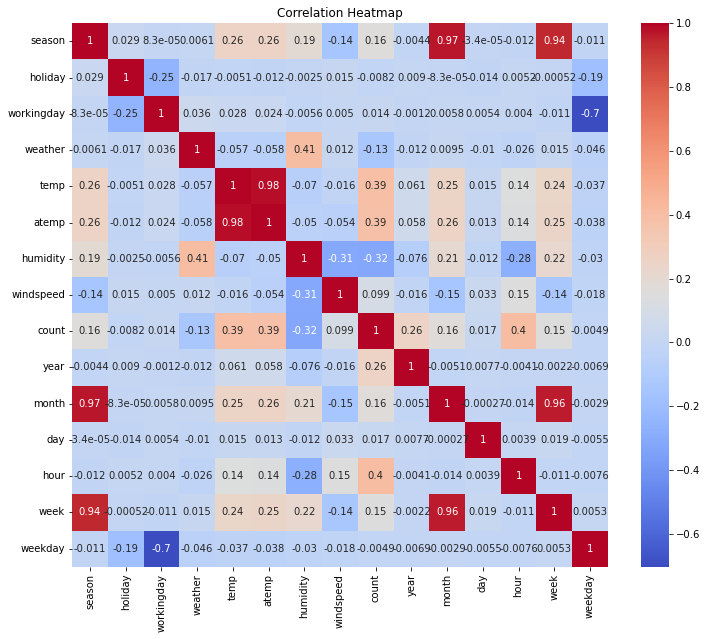

In [21]:
corr = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,time,week,weekday
2815,3,0,1,1,27.88,31.820,83,6.0032,35,2011,7,6,5,05:00:00,27,2
8695,3,0,0,1,36.90,40.910,39,19.9995,450,2012,8,4,16,16:00:00,31,5
8406,3,0,1,1,32.80,35.605,41,16.9979,276,2012,7,11,15,15:00:00,28,2
1543,2,0,0,2,14.76,18.180,93,7.0015,5,2011,4,10,4,04:00:00,14,6
4952,4,0,0,1,13.12,15.150,45,16.9979,200,2011,11,19,10,10:00:00,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,8.335,47,11.0014,38,2012,1,14,2,02:00:00,2,5
5191,4,0,0,1,11.48,12.880,61,19.0012,149,2011,12,10,9,09:00:00,49,5
5390,4,0,0,1,11.48,13.635,48,16.9979,234,2011,12,18,16,16:00:00,50,6
860,1,0,0,1,15.58,19.695,17,35.0008,22,2011,2,19,7,07:00:00,7,5


In [30]:
y_train = train.pop(target)
y_test = test.pop(target)

KeyError: 'count'

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, test, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [8708, 2178]

# Random Forest Regressor Model

In [23]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train, train)
rf_pred = rf.predict(test)
mse = mean_squared_error(test, rf_pred)
r2 = r2_score(test, rf_pred)
print("Mean Squared Error (MSE)", mse)
print("R-squared (R2) score:", r2)

ValueError: could not convert string to float: '05:00:00'

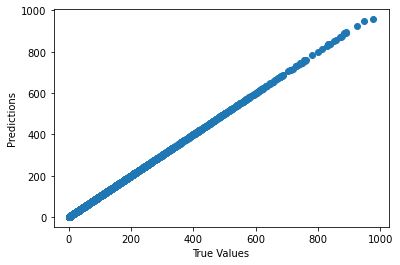

In [28]:
plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# XGBoost Regresson Model

In [29]:
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_round = 100
bst = xgb.train(params, dtrain, num_round)

xgb_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R2) score: {r2:.6f}")

Mean Squared Error (MSE): 0.416789
R-squared (R2) score: 0.999987


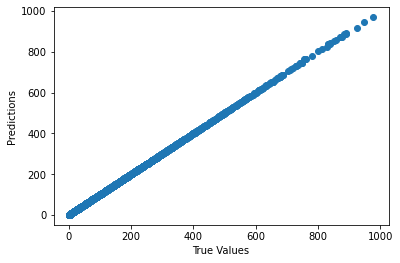

In [30]:
plt.scatter(y_test, xgb_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# LightGBM Regsessor Model

In [31]:
lgbm_model = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=1000)

In [32]:
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

/home/erdenzehra/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/erdenzehra/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='regression')

In [33]:
lgbm_pred = lgbm_model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, lgbm_pred)
r2 = r2_score(y_test, lgbm_pred)
print("Mean Squared Error (MSE): {:.6f}".format(mse))
print("R-squared (R2) score: {:.6f}".format(r2))

Mean Squared Error (MSE): 8.123686
R-squared (R2) score: 0.999754


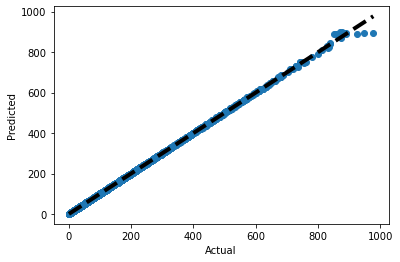

In [35]:
y_true = y_test
plt.scatter(y_true, lgbm_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

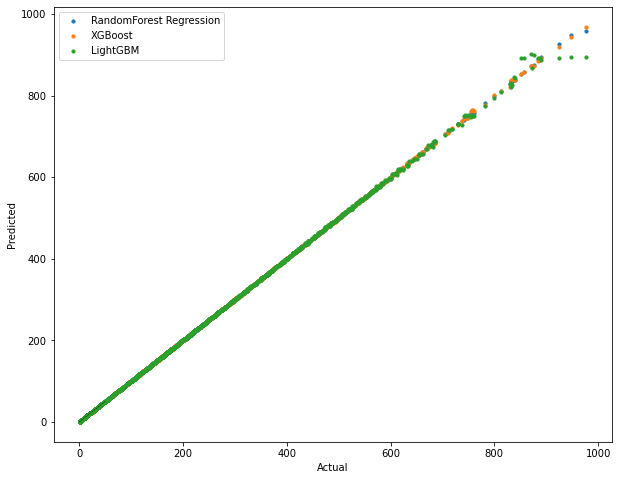

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, rf_pred, s=10, label='RandomForest Regression')
plt.scatter(y_test, xgb_pred, s=10, label='XGBoost')
plt.scatter(y_test, lgbm_pred, s=10, label='LightGBM')

plt.plot([0, 50], [0, 50], '--k', linewidth=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
3133,3,0,1,1,33.62,40.150,59,0.0000,127,2011,7,19,11
5786,1,1,0,1,4.10,6.820,54,6.0032,13,2012,1,16,6
5224,4,0,0,1,9.84,11.365,48,12.9980,163,2011,12,11,18
8953,3,0,1,2,29.52,34.090,62,12.9980,233,2012,8,15,10
8054,2,0,1,1,25.42,31.060,53,16.9979,222,2012,6,15,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012,351,2011,5,8,17
5807,1,0,1,3,13.12,15.150,66,22.0028,2,2012,1,17,4
10061,4,0,0,1,16.40,20.455,40,12.9980,509,2012,11,4,14
5427,1,0,0,1,11.48,14.395,81,7.0015,5,2012,1,1,5


In [53]:
y_pred = rf.predict(X_test)
print(y_pred)

[127.          13.         163.         ... 508.51306782   5.
 239.        ]


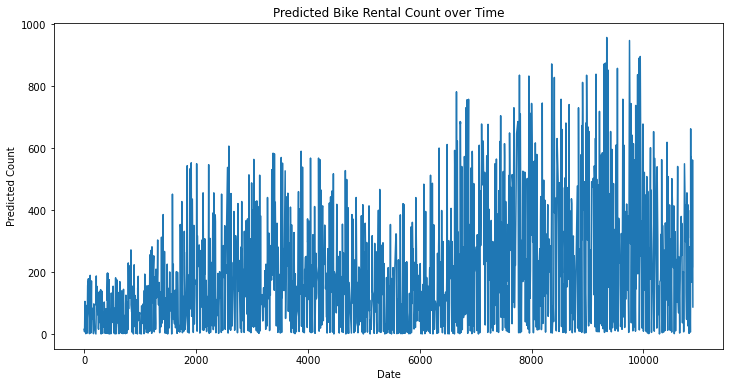

In [55]:
predictions = pd.DataFrame({
    'datetime': X_test.index,
    'predicted_count': y_pred
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=predictions, x='datetime', y='predicted_count')
plt.xlabel('Date')
plt.ylabel('Predicted Count')
plt.title('Predicted Bike Rental Count over Time')
plt.show()
